First try sambil masih belajar", belum pake transfer learning VGG16

**IMPORT** **MODULES**

In [ ]:
import os
import shutil
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

**Download dataset dari Kaggle**

In [ ]:
!pip install kaggle

Upload Kaggle API

In [ ]:
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d alvarole/coffee-leaves-disease

100% 1.39G/1.40G [00:45<00:00, 49.1MB/s]
100% 1.40G/1.40G [00:45<00:00, 32.9MB/s]


In [ ]:
!unzip coffee-leaves-disease.zip

In [ ]:
!mkdir coffee_disease
!mkdir coffee_disease_validation
!mkdir coffee_disease/rust
!mkdir coffee_disease/miner
!mkdir coffee_disease_validation/rust
!mkdir coffee_disease_validation/miner

**FILE PROCESSING**


*   Pemisahan file untuk training dan validation
*   Pemindahan file ke folder dengan nama berdasarkan label foto(Aku sekarang belum paham cara pakai xml untuk labelling jadi pakai ImageGenerator)



In [ ]:
#Persentase file yang akan dijadikan sebagai training
size = 0.8
# direktori asal
directory = '/content/miner_img_xml'

# Spliter = banyak file dalam folder x persentase training file
spliter = len(os.listdir(directory))*size
counter = 0
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    x = re.search("\.jpg$", f)
    # if condition dengan kondisi status ketersediaan file, extensi file, dan batas dari banyaknya file yang akan dipindahkan
    if os.path.isfile(f) and x and counter < spliter and os.path.isfile(os.path.join(directory, os.path.splitext(f)[0] +".xml")):
        counter+=2
        shutil.move(os.path.join(directory, filename), "/content/coffee_disease/miner")
        os.remove(os.path.join(directory, os.path.splitext(f)[0] +".xml"))
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    x = re.search("\.jpg$", f)
    # if condition dengan kondisi status ketersediaan file, dan extensi file
    if os.path.isfile(f) and x and os.path.isfile(os.path.join(directory, os.path.splitext(f)[0] +".xml")):
        shutil.move(os.path.join(directory, filename), "/content/coffee_disease_validation/miner")
        os.remove(os.path.join(directory, os.path.splitext(f)[0] +".xml"))
os.rmdir('/content/miner_img_xml')

In [ ]:
size = 0.8
directory = '/content/rust_xml_image'

spliter = len(os.listdir(directory))*size
counter = 0
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    x = re.search("\.jpg$", f)
    if os.path.isfile(f) and x and counter < spliter and os.path.isfile(os.path.join(directory, os.path.splitext(f)[0] +".xml")):
        counter+=2
        shutil.move(os.path.join(directory, filename), "/content/coffee_disease/rust")
        os.remove(os.path.join(directory, os.path.splitext(f)[0] +".xml"))
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    x = re.search("\.jpg$", f)
    if os.path.isfile(f) and x and os.path.isfile(os.path.join(directory, os.path.splitext(f)[0] +".xml")):
        shutil.move(os.path.join(directory, filename), "/content/coffee_disease_validation/rust")
        os.remove(os.path.join(directory, os.path.splitext(f)[0] +".xml"))
os.rmdir('/content/rust_xml_image')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        '/content/coffee_disease/',
        target_size=(300, 300),
        batch_size=30,
        class_mode='categorical')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/coffee_disease_validation/',
        target_size=(300, 300),
        batch_size=30,
        class_mode='categorical')

Found 435 images belonging to 2 classes.
Found 107 images belonging to 2 classes.


In [ ]:
import tensorflow as tf

# Percobaan model pertama menggunakan 1 set Convolutional, 1 Flatten, dan 1 Dense
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Set training parameters
model.compile(loss='categorical_crossentropy',
              optimizer="rmsprop",
              metrics=['accuracy'])

In [ ]:
# Constant for epochs
EPOCHS = 15

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=15,  
      epochs=EPOCHS,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=4)

Epoch 1/15
15/15 [==============================] - 147s 10s/step - loss: 70.4649 - accuracy: 0.5655 - val_loss: 21.3643 - val_accuracy: 0.4766
Epoch 2/15
15/15 [==============================] - 142s 9s/step - loss: 3.6986 - accuracy: 0.7103 - val_loss: 0.8697 - val_accuracy: 0.6636
Epoch 3/15
15/15 [==============================] - 137s 9s/step - loss: 0.4794 - accuracy: 0.8322 - val_loss: 0.0636 - val_accuracy: 0.9813
Epoch 4/15
15/15 [==============================] - 139s 9s/step - loss: 0.6625 - accuracy: 0.8506 - val_loss: 0.0463 - val_accuracy: 1.0000
Epoch 5/15
15/15 [==============================] - 138s 9s/step - loss: 0.1970 - accuracy: 0.9218 - val_loss: 0.1605 - val_accuracy: 0.9159
Epoch 6/15
15/15 [==============================] - 138s 9s/step - loss: 0.1914 - accuracy: 0.9218 - val_loss: 1.0513 - val_accuracy: 0.7196
Epoch 7/15
15/15 [==============================] - 139s 9s/step - loss: 0.9605 - accuracy: 0.8092 - val_loss: 0.0637 - val_accuracy: 0.9907
Epoch 8/15

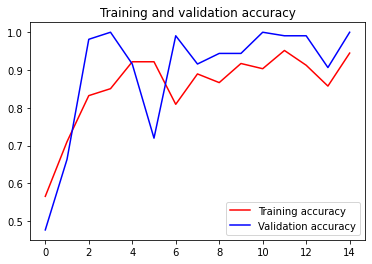

<Figure size 432x288 with 0 Axes>

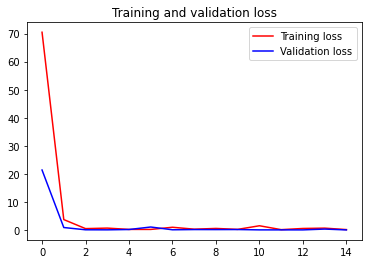

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving Hemileia_vastatrix_Leaf_symptoms.jpg to Hemileia_vastatrix_Leaf_symptoms (2).jpg
Hemileia_vastatrix_Leaf_symptoms.jpg
[[1. 0.]]
